In [1]:
%matplotlib
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [3]:
import math
import gillespy2
from gillespy2.basic_ssa_solver import BasicSSASolver

The performance of this package can be significantly increased if you install Cython.


In [43]:
class DayModel(gillespy2.Model):
    def __init__(self, parameter_values=None, init_v=0):
        # initialize
        gillespy2.Model.__init__(self, name="Macrophage")
        
        # species
        S_ = gillespy2.Species(name='S_', initial_value=1e6+20000)
        M_ = gillespy2.Species(name='M_', initial_value=1e6)
        H_ = gillespy2.Species(name='H_', initial_value=0)
        
        self.add_species([S_,M_,H_])
        
        # parameters
        k2 = gillespy2.Parameter(name='k2', expression=1e-2)
        k3 = gillespy2.Parameter(name='k3', expression=0.05)
        Sa = gillespy2.Parameter(name='Sa_', expression=0)
        MuA = gillespy2.Parameter(name='MuA', expression=0.05)
        
        self.add_parameter([k2,k3,Sa,MuA])
        
        # reactions
        r1 = gillespy2.Reaction(name='r1', reactants={S_:1,M_:1}, products={H_:1},
                               rate=k2)
        
        r2 = gillespy2.Reaction(name='r2', reactants={}, products = {M_:1},
                                rate=Sa)
        
        r3 = gillespy2.Reaction(name='r3', reactants={M_:1}, products = {},
                                rate=MuA)
        
        r4 = gillespy2.Reaction(name='r4', reactants={H_:1}, products = {},
                                rate=k3)
        
        self.add_reaction([r1,r2,r3,r4])
        t = numpy.linspace(0,1,101)
        self.timespan(t)
        print(t)

In [44]:
model = DayModel()

[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2. ]


In [45]:
%time results = model.run(solver=BasicSSASolver, show_labels=True)

Wall time: 32.2 s


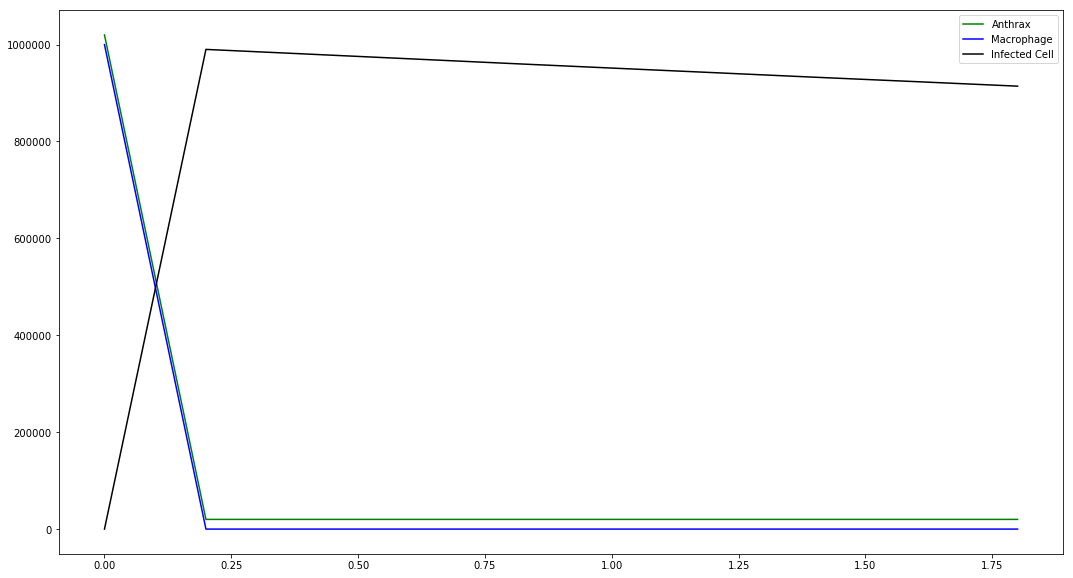

In [46]:
plt.figure(figsize=(18,10))
plt.plot(results['time'], results['S_'], 'g-', label='Anthrax')
plt.plot(results['time'], results['M_'], 'b-', label='Macrophage')
plt.plot(results['time'], results['H_'], 'k-', label='Infected Cell')
plt.legend(loc='best')

